In [1]:
import warnings
#warnings.filterwarnings("ignore")
from main import *

In [2]:
world = run_simulation(54, continue_simulation=False, rag=False)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface model initialized
World Initialized
Agent Initialized with default method
{'8:00': 'wake up and have breakfast', '9:00': 'teach a lesson to a group of students', '10:00': 'take a short break to grade papers and plan lessons', '11:00': 'attend a meeting with the school administration', '12:00': 'have lunch', '13:00': 'work on lesson plans for the afternoon', '14:00': 'teach another lesson', '15:00': 'take a short break to exercise and relax', '16:00': 'attend a parent-teacher conference', '17:00': 'work on lesson plans for the next day', '18:00': 'have dinner', '19:00': 'spend time with family', '20:00': 'take a short break to relax and unwind', '21:00': 'read a book or watch a movie', '22:00': 'prepare for bed', '23:00': 'sleep'}


8:00 - Wake up and have breakfast
9:00 - Teach a lesson to a group of students
10:00 - Take a short break to grade papers and plan lessons
11:00 - Attend a meeting with the school administration
12:00 - Have lunch
13:00 - Work on lesson plans for

/home/sic011/.local/lib/python3.9/site-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


 I am Tom Jackson on Coffee Shop. I will continue grading papers and planning lessons for the next hour. It's important to stay organized and prepared for the upcoming school week. After finishing my tasks
 I am Jack Tomson on Town Square. I will head to the woods to investigate the report of a suspicious person. I will proceed with caution and keep my eyes peeled for any signs of danger. I will also make sure to radio for backup if needed.
====== This hour is end, new hour will start. ======
Current is on 11:00.
 I am Tom Jackson on School. I will attend the meeting with the school administration.
 I am Jack Tomson on Police Office. I will head to the village square to canvas the area and gather information about the recent burglaries. I will speak with the villagers and ask if they have seen or heard anything suspicious. I will also check the local shops and businesses to see if they have any security footage that could help identify the thief.
====== This hour is end, new hour will 

/home/sic011/.local/lib/python3.9/site-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


****************************
{'8:00': 'wake up and have breakfast', '9:00': 'teach mathematics class', '10:00': 'take a short break and have a cup of coffee', '11:00': 'teach english class', '12:00': 'take lunch break and have lunch with colleagues', '13:00': 'attend a staff meeting', '14:00': 'teach science class', '15:00': 'take a short break and grade assignments', '16:00': 'teach history class', '17:00': 'take dinner break and have dinner with family', '18:00': 'spend time with family and relax', '19:00': 'help with homework assignments for students', '20:00': 'attend a community event', '21:00': 'spend time with family and relax', '22:00': 'have a warm bath and get ready for bed', '23:00': 'read a book before bedtime'}


8:00 - Wake up and have breakfast
9:00 - Teach mathematics class
10:00 - Take a short break and have a cup of coffee
11:00 - Teach English class
12:00 - Take lunch break and have lunch with colleagues
13:00 - Attend a staff meeting
14:00 - Teach science class
15:0

In [8]:
import torch 
torch.cuda.empty_cache()

In [10]:
world1 = run_simulation(54, continue_simulation=False, rag=False)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface model initialized
World Initialized
Agent Initialized with default method


RuntimeError: probability tensor contains either `inf`, `nan` or element < 0

In [3]:
tom = world.residents['Tom']

tom.memory_consistency

[tensor([[0.7072]], device='cuda:1'),
 tensor([[0.7352]], device='cuda:1'),
 tensor([[0.7517]], device='cuda:1')]

In [5]:
import matplotlib.pyplot as plt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [7]:
import seaborn as sns

Object `axes.set_x_lim` not found.


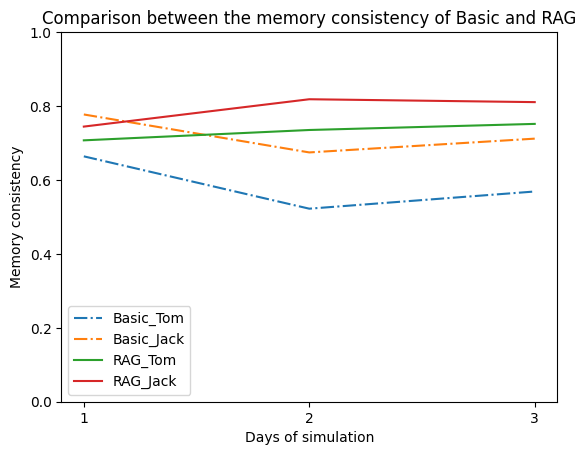

In [27]:
axes = plt.axes()
axes.set_ylim([0, 1])
plt.xticks([1,2,3])
x = [1, 2, 3]
basic_tom = [0.6639, 0.5223, 0.5688]
rag_tom = [0.7072, 0.7352, 0.7517]

basic_jack = [0.7772, 0.6745, 0.7118]
rag_jack = [0.7444, 0.8184, 0.8106]

plt.plot(x, basic_tom, '-.', label ='Basic_Tom')
plt.plot(x, basic_jack, '-.', label ='Basic_Jack')
plt.plot(x, rag_tom, label ='RAG_Tom')
plt.plot(x, rag_jack, label ='RAG_Jack')

plt.xlabel("Days of simulation")
plt.ylabel("Memory consistency")
plt.legend()
plt.title('Comparison between the memory consistency of Basic and RAG')
plt.show()


In [4]:
jack = world.residents['Jack']
jack.memory_consistency

[tensor([[0.7444]], device='cuda:1'),
 tensor([[0.8184]], device='cuda:1'),
 tensor([[0.8106]], device='cuda:1')]

In [24]:
jack = world.residents['Jack']

jack.memory_consistency

[tensor([[0.7772]], device='cuda:1'),
 tensor([[0.6745]], device='cuda:1'),
 tensor([[0.7118]], device='cuda:1')]

In [14]:
index =tom.index
index.ref_doc_info

{'39f24393-31be-4062-af6f-f9cf632f15d6': RefDocInfo(node_ids=['abb4fbd7-87da-4d3b-b806-dbdd2d627666'], metadata={}),
 '56dfb587-0054-430a-bce6-43c2cd14789e': RefDocInfo(node_ids=['0625c265-0da9-4f12-a71b-dfaf64e8895c'], metadata={})}

In [17]:
from llama_index import VectorStoreIndex

query_engine = index.as_query_engine()

query_engine.query("Who is tom's daily plan")

Response(response="Based on the context information provided, Tom's daily plan is as follows:\n\n8:00 AM - Wake up and have breakfast\n9:00 AM - Teach his morning class (Math)\n10:00 AM - Take a short break and grade papers\n11:00 AM - Teach his afternoon class (Science)\n12:00 PM - Have lunch\n1:00 PM - Attend a staff meeting\n2:00 PM - Take a short break and plan for the next day\n3:00 PM - Teach his evening class (English)\n4:00 PM - Take a short break and grade more papers\n5:00 PM - Spend time with his family (wife and kids)\n6:00 PM - Have dinner\n7:00 PM - Attend a community event (volunteer work)\n8:00 PM - Relax and unwind (watch a movie or read a book)\n9:00 PM - Prepare for bed\n10:00 PM - Sleep", source_nodes=[NodeWithScore(node=TextNode(id_='0625c265-0da9-4f12-a71b-dfaf64e8895c', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='56dfb587-0054-430a-bce6-43c2cd1

In [2]:
world = run_simulation(hours_to_run=16, continue_simulation=False)

World Initialized
Agent Initialized
{'8:00': 'wake up, have breakfast', '9:00': 'teach a lesson to the students', '10:00': 'take a break, have a cup of coffee', '11:00': 'attend a meeting with the school principal', '12:00': 'have lunch', '13:00': 'spend time with family', '14:00': 'take a walk around the village', '15:00': 'attend a community event', '16:00': 'help a student with a project', '17:00': 'have dinner', '18:00': 'spend time with family', '19:00': 'read a book', '20:00': 'take a warm bath', '21:00': 'get ready for bed', '22:00': 'sleep'}


8:00 - Wake up, have breakfast
9:00 - Teach a lesson to the students
10:00 - Take a break, have a cup of coffee
11:00 - Attend a meeting with the school principal
12:00 - Have lunch
13:00 - Spend time with family
14:00 - Take a walk around the village
15:00 - Attend a community event
16:00 - Help a student with a project
17:00 - Have dinner
18:00 - Spend time with family
19:00 - Read a book
20:00 - Take a warm bath
21:00 - Get ready for b

KeyError: '23:00'

In [6]:
jack.reflect()

Summarizing today's memory
<Information Given>

Name: Jack Tomson
Action done today: The Current Time is 8 :00 

I will head to the housing area to check on the residents and make sure everything is secure.

<Information Given>

Town Areas: dict\_keys(['Town Square', 'Police Office', 'Supermarket', 'Village Park', 'City Hall', 'Coffee Shop', 'Housing Area', 'School'])
Current Location: The Current Time is 9 :00 

I will head to the housing area to check on the residents and make sure everything is secure. I want to make sure that the residents feel safe and comfortable in their homes. The Current Time is 10 :00 

I will head to the village park to exercise and clear my mind. It's a beautiful day, and I want to take advantage of the weather and get some fresh air. I'll spend some time jogging and doing some stretching to help me stay energized and focused for the rest of the shift. The Current Time is 11 :00 

I will head to the village park to exercise and clear my mind. It's a beautif

In [8]:
jack = world.residents['Jack']
tom = world.residents['Tom']
# for i in jack.memory:
#     print(i)
jack.memory[-16:]

["The Current Time is 8 :00 \n\nI will head to the housing area to check on the residents and make sure everything is secure.\n\n<Information Given>\n\nTown Areas: dict\\_keys(['Town Square', 'Police Office', 'Supermarket', 'Village Park', 'City Hall', 'Coffee Shop', 'Housing Area', 'School'])\nCurrent Location:",
 'The Current Time is 9 :00 \n\nI will head to the housing area to check on the residents and make sure everything is secure. I want to make sure that the residents feel safe and comfortable in their homes.',
 "The Current Time is 10 :00 \n\nI will head to the village park to exercise and clear my mind. It's a beautiful day, and I want to take advantage of the weather and get some fresh air. I'll spend some time jogging and doing some stretching to help me stay energized and focused for the rest of the shift.",
 "The Current Time is 11 :00 \n\nI will head to the village park to exercise and clear my mind. It's a beautiful day, and I want to take advantage of the weather and g

In [4]:
world.cur_time

24

In [ ]:
def calculate_sentence_similarity(memories, plans):
    for name in plans.keys():
        memory_summarization = generate(prompt_meta.format(summarize_prompt.format(name, memories[name])), model, tokenizer)
        initial_plan = plans[name]
        embedding_1= sentence_model.encode(memory_summarization, convert_to_tensor=True)
        embedding_2 = sentence_model.encode(initial_plan, convert_to_tensor=True)
        similarity_score = util.pytorch_cos_sim(embedding_1, embedding_2).tolist()[0][0]
        print("The memory consistency score between intial plan and memory summary for {} is {}".format(name, similarity_score))



In [9]:
lst = ["a", "I plan to go to schhol", "I want to sleep"]

"\n".join(lst[1:])

'I plan to go to schhol\nI want to sleep'

In [12]:
51 % 16

3